In [1]:
import numpy as np
import pandas as pd
import random

## Sex
1 represents male; 0 represents female

In [2]:
# Define el tamaño del conjunto de datos
dataset_size = 10000

# Define el porcentaje real de hombres en la población
porcentaje_hombres_real = 0.505  # Por ejemplo, el 50.5% son hombres

# Calcula el número de hombres en el conjunto de datos sintético
num_hombres = int(dataset_size * porcentaje_hombres_real)

# Crea una columna "sexo" con la proporción correcta
hombres = np.ones(num_hombres)  # 1 representa "hombre"
mujeres = np.zeros(dataset_size - num_hombres)  # 0 representa "mujer"

# Combina las dos listas para obtener la columna completa de "sexo"
columna_sexo = np.concatenate([hombres, mujeres])

# Mezcla los valores para que no estén en orden
np.random.shuffle(columna_sexo)

# Crea un DataFrame con la columna "sexo" y cualquier otra información que desees agregar
data = pd.DataFrame({'Sex': columna_sexo})
data['Sex'] = data['Sex'].astype(int)

## Smoker
1 represents smoker; 0 represents non smoker

In [3]:
# Define el porcentaje de fumadores para hombres y mujeres
porcentaje_fumadores_hombres = 0.367
porcentaje_fumadores_mujeres = 0.078

data['Smoker'] = np.where(data['Sex'] == 1, np.random.choice([0, 1], size=dataset_size, p=[1 - porcentaje_fumadores_hombres, porcentaje_fumadores_hombres]),
                          np.random.choice([0, 1], size=dataset_size, p=[1 - porcentaje_fumadores_mujeres, porcentaje_fumadores_mujeres]))

## PCR
1 represents PCR; 0 not

In [4]:
# Define el porcentaje de PCR para hombres y mujeres
porcentaje_PCR_hombres = 0.024
porcentaje_PCR_mujeres = 0.029


data['Result PCR mycoplasma'] = np.where(data['Sex'] == 1, np.random.choice([0, 1], size=dataset_size, p=[1 - porcentaje_PCR_hombres, porcentaje_PCR_hombres]),
                          np.random.choice([0, 1], size=dataset_size, p=[1 - porcentaje_PCR_mujeres, porcentaje_PCR_mujeres]))

print(data.head())

   Sex  Smoker  Result PCR mycoplasma
0    1       0                      0
1    0       0                      0
2    1       0                      0
3    0       0                      0
4    1       1                      0


## Age

In [5]:
# Define el tamaño del conjunto de datos
tamaño_dataset = 10000

# Set the random seed for reproducibility
np.random.seed(42)

# Mean and variance for the Gaussian distribution
mean = 65
variance = 15

# Generate random values from a Gaussian distribution
gaussian_values = np.random.normal(loc=mean, scale=np.sqrt(variance), size=dataset_size)

# Add a positive offset to skew the distribution to the right
offset = 5
skewed_values = (gaussian_values + offset).astype(int)

data['Age'] = skewed_values

In [6]:
np.min(skewed_values)

54

## Mili
1 represents the individual went to the militar service; 0 the individual did not.

In [7]:
data['Militar service'] = np.where(data['Sex'] == 1, np.random.choice([1, 0], size=dataset_size, p=[0.6, 0.4]),  # sex=1
                            np.random.choice([1, 0], size=tamaño_dataset, p=[0.4, 0.6]))  # sex=0

print(data.head())

   Sex  Smoker  Result PCR mycoplasma  Age  Militar service
0    1       0                      0   71                1
1    0       0                      0   69                1
2    1       0                      0   72                1
3    0       0                      0   75                0
4    1       1                      0   69                1


## Genetic

In [8]:
porcentaje_C9orf72 = 4.1E-6
porcentaje_SOD1 = 7.5E-7
porcentaje_TARDBP = 2E-7
porcentaje_FUS = 1.5E-7

# Calculate the number of individuals with each genetic variant
num_C9orf72 = int(tamaño_dataset * porcentaje_C9orf72)
num_SOD1 = int(tamaño_dataset * porcentaje_SOD1)
num_TARDBP = int(tamaño_dataset * porcentaje_TARDBP)
num_FUS = int(tamaño_dataset * porcentaje_FUS)

# Create lists for each genetic variant
C9orf72 = np.ones(num_C9orf72)
SOD1 = np.ones(num_SOD1)
TARDBP = np.ones(num_TARDBP)
FUS = np.ones(num_FUS)

# Create lists for individuals without each genetic variant
no_C9orf72 = np.zeros(dataset_size - num_C9orf72)
no_SOD1 = np.zeros(dataset_size - num_SOD1)
no_TARDBP = np.zeros(dataset_size - num_TARDBP)
no_FUS = np.zeros(dataset_size - num_FUS)

# Combine the lists to obtain columns for each genetic variant
columna_C9orf72 = np.concatenate([C9orf72, no_C9orf72])
columna_SOD1 = np.concatenate([SOD1, no_SOD1])
columna_TARDBP = np.concatenate([TARDBP, no_TARDBP])
columna_FUS = np.concatenate([FUS, no_FUS])

np.random.shuffle(columna_C9orf72)
np.random.shuffle(columna_FUS)
np.random.shuffle(columna_TARDBP)
np.random.shuffle(columna_SOD1)

# Add columns for each gene to the 'data' DataFrame
data['C9orf72'] = columna_C9orf72.astype(int)
data['SOD1'] = columna_SOD1.astype(int)
data['TARDBP'] = columna_TARDBP.astype(int)
data['FUS'] = columna_FUS.astype(int)

In [9]:
print(data.head())

   Sex  Smoker  Result PCR mycoplasma  Age  Militar service  C9orf72  SOD1  \
0    1       0                      0   71                1        0     0   
1    0       0                      0   69                1        0     0   
2    1       0                      0   72                1        0     0   
3    0       0                      0   75                0        0     0   
4    1       1                      0   69                1        0     0   

   TARDBP  FUS  
0       0    0  
1       0    0  
2       0    0  
3       0    0  
4       0    0  


## Profession

In [10]:
professions = ['mechanic', 'painter', 'constructor','cashier', 'doctor', 'janitor','engineer', 'accountant', 'waiter', 'teacher', 'policeman', 'fireman', 'manager', 'electrician', 'lawyer']
professionsWithOR = ['mechanic', 'painter', 'constructor']

data['Professions'] = [random.choice(professions) for _ in range(dataset_size)]

data['Mechanic'] = data['Professions'].apply(lambda x: 1 if x == 'mechanic' else 0)
data['Painter'] = data['Professions'].apply(lambda x: 1 if x == 'painter' else 0)
data['Constructor'] = data['Professions'].apply(lambda x: 1 if x == 'constructor' else 0)

## Ethnity

In [11]:
ethnicities = ['caucasian', 'black', 'mestizo', 'indian', 'asian']
ethnicityWithOR = ['caucasian', 'black', 'mestizo', 'indian']

data['Ethnicity'] = [random.choice(ethnicities) for _ in range(dataset_size)]

data['Caucasian'] = data['Ethnicity'].apply(lambda x: 1 if x == 'caucasian' else 0)
data['Black'] = data['Ethnicity'].apply(lambda x: 1 if x == 'Black' else 0)
data['Mestizo'] = data['Ethnicity'].apply(lambda x: 1 if x == 'mestizo' else 0)
data['Indian'] = data['Ethnicity'].apply(lambda x: 1 if x == 'indian' else 0)

In [12]:
data.head()

,Sex,Smoker,Result PCR mycoplasma,Age,Militar service,C9orf72,SOD1,TARDBP,FUS,Professions,Mechanic,Painter,Constructor,Ethnicity,Caucasian,Black,Mestizo,Indian
0,1,0,0,71,1,0,0,0,0,manager,0,0,0,black,0,0,0,0
1,0,0,0,69,1,0,0,0,0,manager,0,0,0,asian,0,0,0,0
2,1,0,0,72,1,0,0,0,0,fireman,0,0,0,asian,0,0,0,0
3,0,0,0,75,0,0,0,0,0,policeman,0,0,0,mestizo,0,0,1,0
4,1,1,0,69,1,0,0,0,0,waiter,0,0,0,mestizo,0,0,1,0


## Probability

In [27]:
import math
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Age standarized'] = scaler.fit_transform(data[['Age']])
data['Probability'] = 0.138895 * data['Sex'] + 0.0198026 * data['Age standarized'] + 0.22314 * data['Smoker'] + 0.83724 * data['Militar service'] + 2.10010 * data['Result PCR mycoplasma'] + 0.7178398 * data['Mechanic'] + 0.86288995 * data['Painter'] + 0.77473 * data['Constructor'] + 1.071584 * data['Caucasian'] - 3.21887 * data['Black'] - 2.9957 * data['Mestizo'] - 3.91202 * data['Indian'] + 1.28 * data['C9orf72'] + 2.036012 * data['SOD1'] + 1.652497 * data['TARDBP'] + 1.86097 * data['FUS']

In [28]:
data['Probability'] = data['Probability'].apply(lambda x: math.exp(x))

In [29]:
data.head()

,Sex,Smoker,Result PCR mycoplasma,Age,Militar service,C9orf72,SOD1,TARDBP,FUS,Professions,Mechanic,Painter,Constructor,Ethnicity,Caucasian,Black,Mestizo,Indian,Probability,Age standarized
0,1,0,0,71,1,0,0,0,0,manager,0,0,0,black,0,0,0,0,2.683158,0.548387
1,0,0,0,69,1,0,0,0,0,manager,0,0,0,asian,0,0,0,0,2.332223,0.483871
2,1,0,0,72,1,0,0,0,0,fireman,0,0,0,asian,0,0,0,0,2.684873,0.580645
3,0,0,0,75,0,0,0,0,0,policeman,0,0,0,mestizo,0,0,1,0,0.050677,0.677419
4,1,1,0,69,1,0,0,0,0,waiter,0,0,0,mestizo,0,0,1,0,0.167488,0.483871


In [30]:
data['Probability'] = data['Probability'].apply(lambda x: (x/(1+x)))

In [31]:
data.head()

,Sex,Smoker,Result PCR mycoplasma,Age,Militar service,C9orf72,SOD1,TARDBP,FUS,Professions,Mechanic,Painter,Constructor,Ethnicity,Caucasian,Black,Mestizo,Indian,Probability,Age standarized
0,1,0,0,71,1,0,0,0,0,manager,0,0,0,black,0,0,0,0,0.728494,0.548387
1,0,0,0,69,1,0,0,0,0,manager,0,0,0,asian,0,0,0,0,0.699900,0.483871
2,1,0,0,72,1,0,0,0,0,fireman,0,0,0,asian,0,0,0,0,0.728620,0.580645
3,0,0,0,75,0,0,0,0,0,policeman,0,0,0,mestizo,0,0,1,0,0.048233,0.677419
4,1,1,0,69,1,0,0,0,0,waiter,0,0,0,mestizo,0,0,1,0,0.143460,0.483871


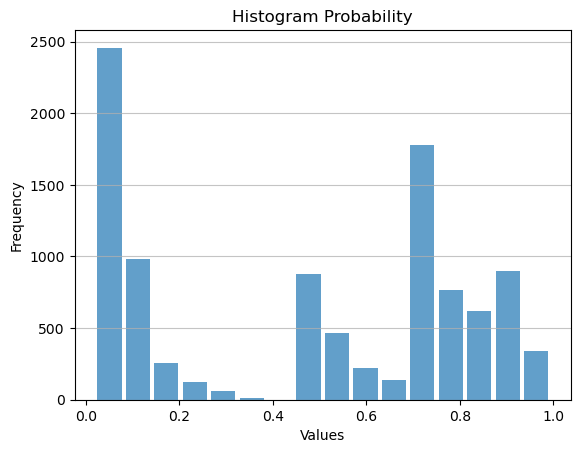

In [35]:
import matplotlib.pyplot as plt
plt.hist(data['Probability'], bins='auto', alpha=0.7, rwidth=0.85)
plt.title('Histogram Probability')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [38]:
prevalence = (data['Probability'] > 0.6).sum() / len(data)

In [39]:
print(prevalence)

0.4543


In [42]:
data.drop(['Age standarized', 'Mechanic', 'Painter', 'Constructor', 'Caucasian', 'Black', 'Mestizo', 'Indian'], axis=1)

,Sex,Smoker,Result PCR mycoplasma,Age,Militar service,C9orf72,SOD1,TARDBP,FUS,Professions,Ethnicity,Probability
0,1,0,0,71,1,0,0,0,0,manager,black,0.728494
1,0,0,0,69,1,0,0,0,0,manager,asian,0.699900
2,1,0,0,72,1,0,0,0,0,fireman,asian,0.728620
3,0,0,0,75,0,0,0,0,0,policeman,mestizo,0.048233
4,1,1,0,69,1,0,0,0,0,waiter,mestizo,0.143460
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,75,1,0,0,0,0,fireman,caucasian,0.872388
9996,0,0,0,62,0,0,0,0,0,cashier,black,0.501278
9997,1,0,0,67,1,0,0,0,0,mechanic,caucasian,0.941247
9998,0,0,0,71,0,0,0,0,0,fireman,caucasian,0.746956
